## №1
Loss X are exponentially distributed with an average value of 100 million rubles. What is 95% level VaR?

In [152]:
from scipy.stats import expon
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

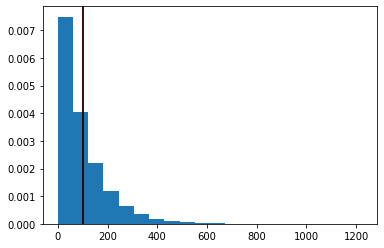

Ответ:  VaR = 299.32


In [153]:
# Создаем данные - экспоненциальное распределение со средним 100
exp = np.random.exponential(100, 1000000)
exp = pd.Series(exp)

plt.hist(exp, 20, density = True)
plt.axvline(x=100, color = 'red')
plt.axvline(x=exp.mean(), color = 'black')
plt.show()

level = 0.95
VaR = exp.quantile(level, interpolation = 'higher')
VaR
print(f'Ответ:  VaR = {VaR.round(2)}')

Вопрос:   
1. Правильно я поняла, что нужно генерировать рандомные данные, а не какую-то непрерывное распределение?

## №2
The asset returns are normally distributed. The expected return is non-negative, and 95% VaR is 100 million. ES at the same confidence level can be:

Вопросы:
1. Ну да, я чисто логически понимаю, что так должно быть, потому что ES не может прям сильно превышать VaR, но возможно ли это вычислить?  
2. Возможно ли восстановить нормальное распределение по квартилю, не зная мат ожидания и дисперсии?

## №3
The analyst built a model to estimate VaR for the monthly financial results of the bank's trading division. He expects that losses greater then VaR occur once per two years on average . 
It is known that over the last 10 years actual losses hit estimated VaR nine times.

Apply one-sided binomial test and determine the traffic-light zone that the model falls into.

H0: Корректное число дней, когда потери превзошли ожидаемый уровень (Value at Risk)  
H1: Процент дней, когда потери превзошли ожидаемый уровень (Value at Risk) больше 1% (или 5%, или 10%)  
Если модель выдает много таких превышений ожидаемого уровня, значит она недооценивает потери

In [154]:
N = 10*12
n = 9

p_val = ss.binom_test(n, N, 1/24, alternative="greater")

def zone(p):
  if p > 0.05:
    return "green" # гипотеза верна, оставляем модель - хорошо работает
  elif p > 0.0001: 
    return "yellow" # возможно это случайность, отправляем модель на карантин, нужно докрутить
  else:
    return "red"

print('Reality: n / N = {:.2},\nExpectation:  = {:.2}, \np-value = {:.2}'.format(n/N, 1 / 24, p_val))
print(zone(p_val))

Reality: n / N = 0.075,
Expectation:  = 0.042, 
p-value = 0.064
green


## №4
The following code generates series of daily values of stock index:



2021-05-03         NaN
2021-05-04    0.001175
2021-05-05   -0.001763
2021-05-06   -0.002356
2021-05-07    0.000000
                ...   
2021-08-26    0.001198
2021-08-27    0.000598
2021-08-30   -0.005397
2021-08-31    0.001802
2021-09-01    0.003595
Freq: B, Name: return, Length: 88, dtype: float64

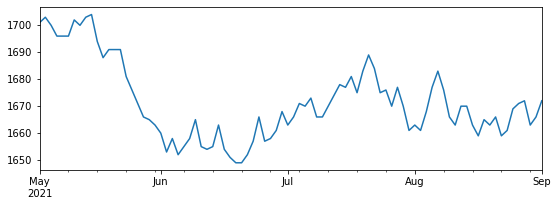

In [159]:
np.random.seed(14)
index_quotes = pd.Series(1700 + np.cumsum(np.random.randint(-10, 10, size=88)), index=pd.period_range(end="2021-09-01", periods=88, freq="B"), name='return')
assert index_quotes.iloc[0] == 1701, "Something is wrong! Contact the teacher"

plt.figure(figsize=(9,3))
index_quotes.plot()

# Посчитаем доходность, так количество наблюдений точно сократится на 1
index_quotes = np.log(index_quotes).diff() # log-returns
index_quotes


The corresponding 1-day VaR estimates (denominated in basis points, 0.01%) for the same dates are generated by following code:


2021-06-04    40
2021-06-07    55
2021-06-08    57
2021-06-09    50
2021-06-10    45
              ..
2021-09-03    46
2021-09-06    54
2021-09-07    56
2021-09-08    59
2021-09-09    56
Freq: B, Name: VaRs, Length: 70, dtype: int64


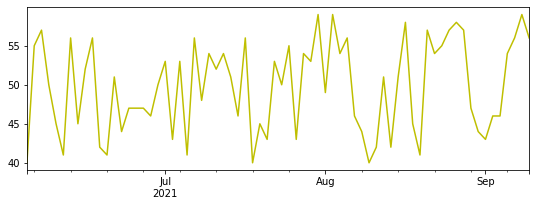

In [108]:
np.random.seed(88)
VaRs = pd.Series(50 + np.random.randint(-10, 10, size=70), index=pd.period_range(end="2021-09-09", periods=70, freq="B"), name = 'VaRs')
assert VaRs.iloc[0] == 40, "Something is wrong! Contact the teacher"
print(VaRs)
plt.figure(figsize=(9,3))
VaRs.plot(color ='y')


Determine how many observations these two series can provide for the back-test of 1-day VaR.

In [155]:
# У доходностей и value-at-risk разные даты, поэтому нужно найти только пересекающиеся
print('Ответ:', len(pd.merge(index_quotes, VaRs, left_index=True, right_index=True)))

Ответ: 64


## №5
The following code generates series of daily values of stock index:

In [160]:
np.random.seed(14)
index_quotes = pd.Series(1700 + np.cumsum(np.random.randint(-10, 10, size=88)), index=pd.period_range(end="2021-09-01", periods=88, freq="B"), name = 'diff')
assert index_quotes.iloc[0] == 1701, "Something is wrong! Contact the teacher"

# Посчитаем доходность, так количество наблюдений точно сократится на 1
index_quotes = index_quotes.pct_change()*100 # это %-ы
index_quotes
pd.DataFrame(index_quotes).head()

,diff
2021-05-03,NaN
2021-05-04,0.117578
2021-05-05,-0.176160
2021-05-06,-0.235294
2021-05-07,0.000000



The corresponding 1-day VaR estimates (denominated in basis points, 0.01%) for the same dates are generated by following code:


In [145]:
np.random.seed(88)
# Это записаны сотые доли от процента (denominated in basis points, 0.01%)
VaRs = pd.Series(50 + np.random.randint(-10, 10, size=70), index=pd.period_range(end="2021-09-09", periods=70, freq="B"), name='vars')
assert VaRs.iloc[0] == 40, "Something is wrong! Contact the teacher"
print(VaRs)

2021-06-04    40
2021-06-07    55
2021-06-08    57
2021-06-09    50
2021-06-10    45
              ..
2021-09-03    46
2021-09-06    54
2021-09-07    56
2021-09-08    59
2021-09-09    56
Freq: B, Name: vars, Length: 70, dtype: int64



Find out how many times actual losses hit VaR estimates.

In [166]:
data = pd.merge(index_quotes, VaRs*0.01, left_index=True, right_index=True)
print(data[data['diff'] < -data['vars']].head(),'\n')
print('Ответ:', len(data[data['diff'] < -data['vars']]))

                diff  vars
2021-06-10 -0.600601  0.45
2021-06-16 -0.541191  0.52
2021-06-25 -0.540216  0.47
2021-07-23 -0.534442  0.50
2021-08-10 -0.596659  0.40 

Ответ: 6
